<a href="https://colab.research.google.com/github/mohamedbakrey12/Advanced-Data-Science/blob/master/Classification_for_Sentmentans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
   In this project I work for classification model for arabic words

### Project Pipeline

1.  Loading the library
2. Loading Dataset
3. Data pre-Processing
4. Applying the Model Machine Learning
5. Applying
6. Applying the

# 1. Loading Library

In [ ]:
# Using this for working with dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


# Spliting the data
from sklearn.model_selection import train_test_split


# Using this library for transform the data into numeric
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Modeling machine learning
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier



# For Metrics, to check the model evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot


# Using this library for the LSTM model Deep learning.

from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
import keras.backend as K
from keras.callbacks import LearningRateScheduler




# Saving the Model
import pickle
# loading the model
from keras.models import load_model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 2. Read the dataset

In [ ]:
# Here read the read the data by using pandas library
df=pd.read_csv('/content/Last_Complete_Data_8224.csv')
# Show the first 10 rows
df.head(10)

,Review_ID,aspectCategory,sentiment,Pre_Text
0,1,seating,positive,seating copy comfortable perfect relaxing coff...
1,2,seating,negative,love alliance café seating bit cramped negativ...
2,3,seating,positive,seating arrangement wellspaced allowing privac...
3,4,seating,negative,honestly seating quite uncomfortable wish fash...
4,5,seating,positive,appreciate variety seating options high tools ...
5,6,seating,negative,café lovely seating feels bit crowded hard rel...
6,7,seating,positive,outdoor seating area charming especially sunny...
7,8,seating,negative,enjoy coming work seating isnt economic negati...
8,9,seating,positive,seating window offers nice view street outside...
9,10,seating,negative,chairs surprisingly uncomfortable copy café do...


In [ ]:
df.shape

(8224, 4)

###  Cheack the data

In [ ]:
# Check the nulls values
df.isna().sum()

Review_ID         0
aspectCategory    0
sentiment         0
Pre_Text          0
dtype: int64

In [ ]:
# check the information for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8224 entries, 0 to 8223
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review_ID       8224 non-null   int64 
 1   aspectCategory  8224 non-null   object
 2   sentiment       8224 non-null   object
 3   Pre_Text        8224 non-null   object
dtypes: int64(1), object(3)
memory usage: 257.1+ KB


Text(0.5, 1.0, 'Sentiment Data Distribution')

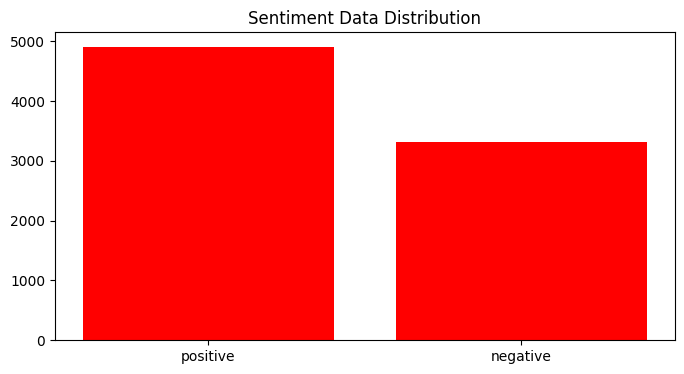

In [ ]:
# Check the label for the data
val_count = df.sentiment.value_counts()
# Figure size
plt.figure(figsize=(8,4))
# Using Bar plot to ploting the count of labeling data.
plt.bar(val_count.index, val_count.values, color='red')
# Set title for the plot.
plt.title("Sentiment Data Distribution")

# 3. Data Pre-processing

In [ ]:
"""
This function for processing the data,
here check the stopwords and steeming.
"""
def preprocess(text):
    text = text.split()
    # Check the stopwords.
    stop = set(stopwords.words('english'))
    # Check the Stemmer for the data
    stemmer = SnowballStemmer('arabic')
    text = [stemmer.stem(word) for word in text if not word in stop]
    return " ".join(text)


# Apply the function for the data.
df['Pre_Text'] = df['Pre_Text'].apply(preprocess)

In [ ]:
# Check the data after make processing on it.
df['Pre_Text']

0       seating copy comfortable perfect relaxing coff...
1       love alliance café seating bit cramped negativ...
2       seating arrangement wellspaced allowing privac...
3       honestly seating quite uncomfortable wish fash...
4       appreciate variety seating options high tools ...
                              ...                        
8219    pancake good dont blueberry pancake menu able ...
8220    waiter disappeared entirely food finally able ...
8221    90 powerhouse steak 2 ordered mediumrare deliv...
8222                     food good writers pushyrude dumb
8223                     food good writers pushyrude dumb
Name: Pre_Text, Length: 8224, dtype: object

# 4. Apply the Tokenization on the data.
* Here we work on make transformation on the data to convert the data from text to numeric to make the model understand it.

In [ ]:
# Apply the tf-idf on the data.
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['Pre_Text'])
print(vectors[:10])

  (0, 2931)	0.2647556160218235
  (0, 6026)	0.33571596609309856
  (0, 2262)	0.2830411056136541
  (0, 1150)	0.4150513769019654
  (0, 1724)	0.27879802578827956
  (0, 6495)	0.39390936030219426
  (0, 5807)	0.2692630633899459
  (0, 1765)	0.2976178020578213
  (0, 1973)	0.3174144420466364
  (0, 6931)	0.2647556160218235
  (1, 5967)	0.389674698437371
  (1, 5257)	0.3929045409341167
  (1, 2038)	0.39631390905667474
  (1, 1001)	0.2846560158169301
  (1, 1302)	0.4018118693873419
  (1, 410)	0.3390540218848628
  (1, 4679)	0.307027906000935
  (1, 6931)	0.2915636226595738
  (2, 673)	0.32340845563792847
  (2, 2767)	0.3097960916375223
  (2, 6145)	0.34730379793201
  (2, 415)	0.370307384921663
  (2, 8651)	0.41978028168820364
  (2, 633)	0.3290448237308489
  (2, 1302)	0.2949245914266849
  :	:
  (7, 4653)	0.2564052612034741
  (7, 7394)	0.3180891894748466
  (7, 2651)	0.4351910299599506
  (7, 4191)	0.3344423441109402
  (7, 8757)	0.2885025915024409
  (7, 1769)	0.32029269574928376
  (7, 2764)	0.27855784710456116
  (

#### Convert the target columns from the text to numeric by using Label Encoding

In [ ]:
# Apply the Label encoding on the target columns.
le = LabelEncoder()
label=le.fit_transform(df['sentiment'])

#### Spliting the data into train and test to use it to train the model.

In [ ]:
# here apply the train_test-split function on the data.
X_train, X_test, y_train, y_test = train_test_split(vectors, label, test_size=0.2, random_state=42)

In [ ]:
print("Shape of the Train data set: ",X_train.shape)
print("Shape of the test data set:",X_test.shape)
print("Shape of the y_train data set",y_train.shape)
print("Shape of the y_test data set",y_test.shape)

Shape of the Train data set:  (6579, 8848)
Shape of the test data set: (1645, 8848)
Shape of the y_train data set (6579,)
Shape of the y_test data set (1645,)


# 5. Apply Model Machine Learning.

### Using Logistic Regression.

In [ ]:
# making LogisticRegression Model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
print('LogisticRegression Train Score is : ' , classifier.score(X_train, y_train))
print('LogisticRegression Test Score is : ' , classifier.score(X_test, y_test))

LogisticRegression Train Score is :  0.8706490348077215
LogisticRegression Test Score is :  0.8066869300911854


##### Ckeck the model predicton

In [ ]:
#making predictions on test data
y_predict = classifier.predict(X_test)
print(y_predict)

[1 1 1 ... 1 1 1]


##### Check the Confusion Matrix

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,y_predict)

<Axes: title={'center': 'Confusion Matrix for the Model Logistic Regression'}>

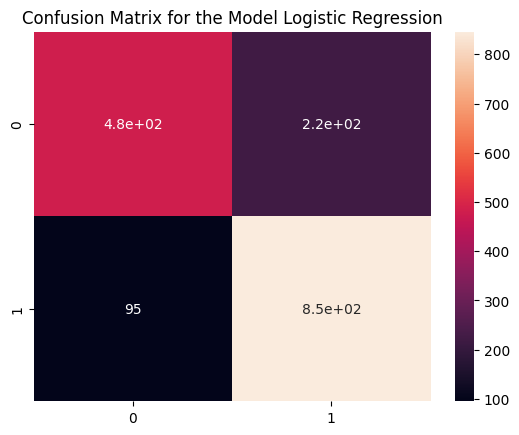

In [ ]:
# Ploting the confusion matrix
plt.title("Confusion Matrix for the Model Logistic Regression")
sns.heatmap(cm, annot=True)

#### Check the the Sensitivity and Specificity

In [ ]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8350694444444444
Specificity :  0.7913938260056127


#### Check the the PPV nad NPV

In [ ]:
total=sum(sum(cm))

# this for Positive Predictive Value.
ppv = cm[0,0]/(cm[0,0]+cm[0,1])
print('ppv : ', ppv )
# negative Predictive Value.
npv = cm[1,1]/(cm[1,0]+cm[1,1])
print('npv : ', npv)

ppv :  0.8372093023255814
npv :  0.9344262295081968


#### Check the metrics

In [ ]:
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
F1Score = f1_score(y_test, y_predict, average='micro')
print('F1 Score is : ', F1Score)

F1 Score is :  0.8775510204081631


In [ ]:
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2
RecallScore = recall_score(y_test, y_predict, average='micro')
print('Recall Score is : ', RecallScore)

Recall Score is :  0.8775510204081632


In [ ]:
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))
PrecisionScore = precision_score(y_test, y_predict, average='micro')
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.8775510204081632


In [ ]:
#Calculating Precision recall Score
PrecisionRecallScore = precision_recall_fscore_support(y_test, y_predict, average='micro')
print('Precision Recall Score is : ', PrecisionRecallScore)

Precision Recall Score is :  (0.8066869300911854, 0.8066869300911854, 0.8066869300911854, None)


In [ ]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_predict, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  0.19331306990881458


In [ ]:
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_predict, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)



#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test,y_predict)
print('Median Squared Error Value is : ', MdSEValue )

Mean Squared Error Value is :  0.12244897959183673
Median Squared Error Value is :  0.0


### Ploting the ROC Curve

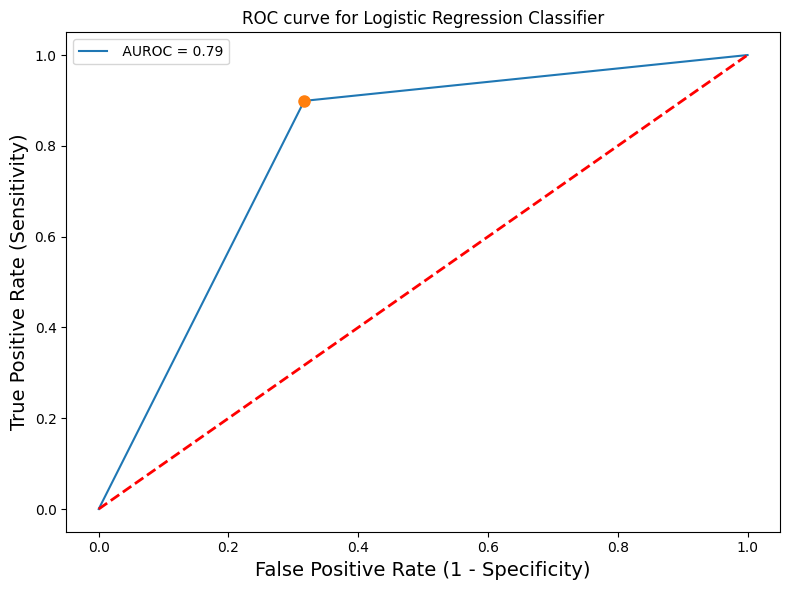

In [ ]:
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,y_predict)

roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))

ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)

ax2.set_xlabel("False Positive Rate", fontsize = 14)

ax2.set_ylabel("True Positive Rate", fontsize = 14)

ax2.set_title("ROC Curve", fontsize = 18)

ax2.legend(loc = 'best')

plt.title('ROC curve for Logistic Regression Classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))

ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)

plt.tight_layout()

In [ ]:
# Saving the model
pickle.dump(classifier, open("model.pkl", "wb"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 Input the sentabceseating copy comfortable perfect relaxing coff
Predicted Class: positive
negative: 7.298414409802179%\ positive: 92.70158559019782%


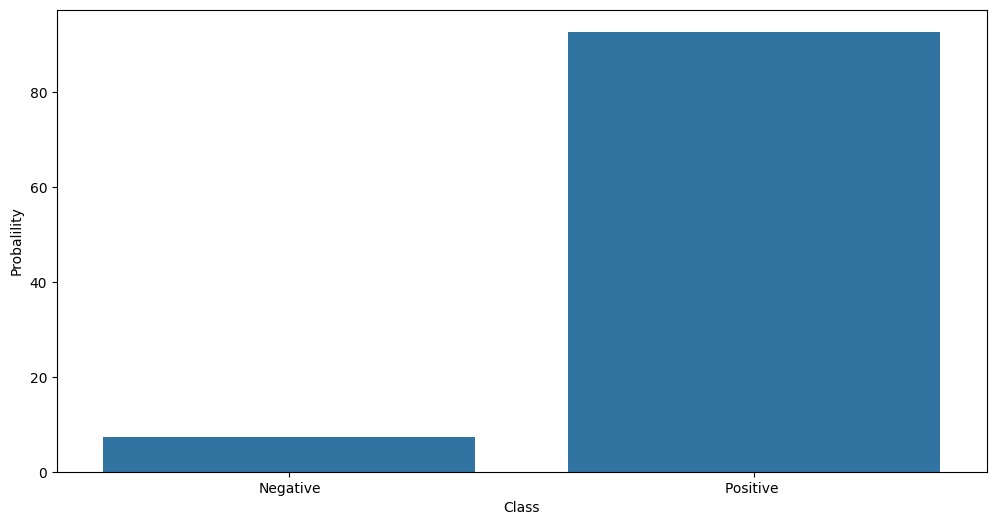

In [ ]:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def predict_class(classifier):
    text = input(' Input the sentabce')
    text = [' '.join([ word for word in word_tokenize(text)  if not word in stop_words])]
    t_dtv = vectorizer.transform(text).toarray()
    print('Predicted Class:', end = ' ')
    print('positive' if classifier.predict(t_dtv)[0] else 'negative')
    prob = classifier.predict_proba(t_dtv)*100
    print(f"negative: {prob[0][0]}%\ positive: {prob[0][1]}%")
    plt.figure(figsize=(12, 6))
    sns.barplot(x =['Negative', 'Positive '] , y = [prob[0][0], prob[0][1]])
    plt.xlabel('Class')
    plt.ylabel('Probalility')
    plt.show()



predict_class(classifier)